In [1]:
# Let's import important modules and libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Check versions
torch_ver = torch.__version__
print(f"PyTorch Version: {torch_ver}")

PyTorch Version: 2.5.1


In [3]:
# Build Device-agnostic codes
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current Active Device: {device}")

Current Active Device: cuda


In [4]:
# Create linear parameters
weight = 0.27
bias = 0.68

# Build Dataset for training
start = 0
end = 1
steps = 0.0014

# Create Features and labels
X = torch.arange(start, end, steps).unsqueeze(dim=1)
y = weight * X + bias
print(f"X length = {len(X)}\ny length = {len(y)}")
X[:10], y[:10]

X length = 715
y length = 715


(tensor([[0.0000],
         [0.0014],
         [0.0028],
         [0.0042],
         [0.0056],
         [0.0070],
         [0.0084],
         [0.0098],
         [0.0112],
         [0.0126]]),
 tensor([[0.6800],
         [0.6804],
         [0.6808],
         [0.6811],
         [0.6815],
         [0.6819],
         [0.6823],
         [0.6826],
         [0.6830],
         [0.6834]]))

In [5]:
# Spliting the data for Train and Test
train_split = int(0.75 * len(X))
print(f"Train Split Size: {train_split}")
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f"X_train Length = {len(X_train)}, y_train Length = {len(y_train)}")
print(f"X_test Length = {len(X_test)}, y_test Length = {len(y_test)}")
print(f"{len(X_train), len(y_train), len(X_test), len(y_test)}")

Train Split Size: 536
X_train Length = 536, y_train Length = 536
X_test Length = 179, y_test Length = 179
(536, 536, 179, 179)


In [6]:
# Visualize the Train, Test, and Prediction data
def plot_pred(train_data=None, train_labels=None,
             test_data=None, test_labels=None,
             predictions=None):
    plt.figure(figsize=(8,5))
    if train_data is not None and train_labels is not None:
        plt.scatter(train_data, train_labels, s=4, label="Train Data")
    if test_data is not None and test_labels is not None:
        plt.scatter(test_data, test_labels, s=4, label="Test Data")
    # Check for predictions in inference_mode()
    if predictions is not None and test_data is not None:
        plt.scatter(test_data, predictions, s=4, label="Predictions")
        
    plt.legend(prop={"size" : 12})
    plt.title("Train, Test, and Prediction")
    plt.show()

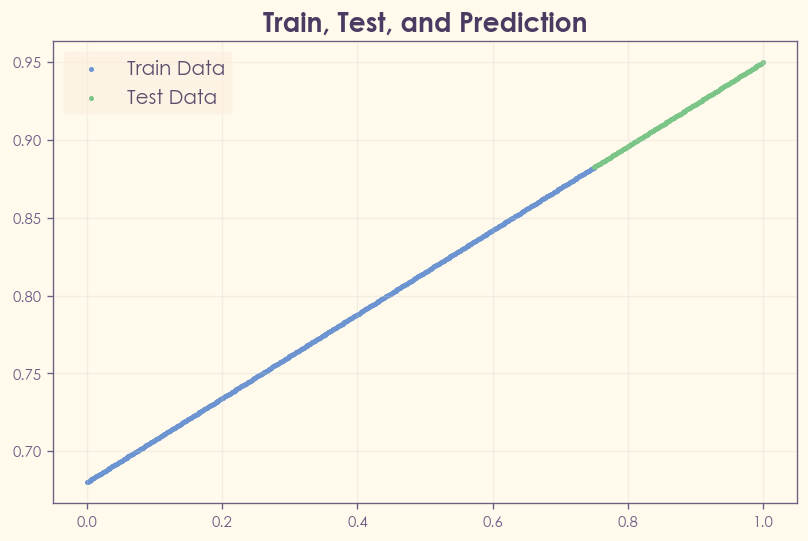

In [7]:
plot_pred(X_train, y_train, X_test, y_test)

In [8]:
# Create a Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)
        
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [9]:
# Build a model instance
torch.manual_seed(42)
model = LinearRegressionModel()
print(model, model.state_dict())

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [10]:
# Check our model's current device
model_device = next(model.parameters()).device
print(f"Model's current device: {model_device}")
print(f"Our preferred device: {device}")

Model's current device: cpu
Our preferred device: cuda


In [11]:
# Set Model to our preferred device
model.to(device)
model_device = next(model.parameters()).device
print(f"Model's current device: {model_device}")
print(f"Our preferred device: {device}")

Model's current device: cuda:0
Our preferred device: cuda


In [12]:
# Set the data to our preferred device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [13]:
# Setting up training loop by initializing `loss` and `optimizer`
loss_fn = nn.L1Loss() # MAE Loss

optimizer = torch.optim.SGD(params=model.parameters(), # setting parameters
                           lr=0.001) # learning_rate

In [14]:
# Construct a training Loop
epochs = 2800

# Track values to compare and evaluate
epoch_count = []
train_loss_values = []
test_loss_values = []

# Training Loop
for epoch in range(epochs):
    # 1. Initiate Train mode
    model.train()
    
    # 2. Forward pass
    y_pred = model(X_train)
    
    # 3. Calculate the loss
    train_loss = loss_fn(y_pred, y_train)
    
    # 4. Optimizer zero_grad()
    optimizer.zero_grad()
    
    # 5. Back Propagation
    train_loss.backward()
    
    # 6. Optimizer step
    optimizer.step()
    
    
    # Testing Loop
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    
    
    # print the progress
    if epoch % 100 == 0:
        # Store values to evaluate
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.item())
        test_loss_values.append(test_loss.item())
        print(f"| Epoch: {epoch:04d} | Train Loss: {train_loss:.6f} | Test Loss: {test_loss:.6f} |")

| Epoch: 0000 | Train Loss: 0.335213 | Test Loss: 0.581401 |
| Epoch: 0100 | Train Loss: 0.221189 | Test Loss: 0.448634 |
| Epoch: 0200 | Train Loss: 0.120225 | Test Loss: 0.323398 |
| Epoch: 0300 | Train Loss: 0.081175 | Test Loss: 0.242990 |
| Epoch: 0400 | Train Loss: 0.068803 | Test Loss: 0.197694 |
| Epoch: 0500 | Train Loss: 0.063719 | Test Loss: 0.172370 |
| Epoch: 0600 | Train Loss: 0.060277 | Test Loss: 0.157020 |
| Epoch: 0700 | Train Loss: 0.057152 | Test Loss: 0.146188 |
| Epoch: 0800 | Train Loss: 0.054081 | Test Loss: 0.137285 |
| Epoch: 0900 | Train Loss: 0.051018 | Test Loss: 0.129157 |
| Epoch: 1000 | Train Loss: 0.047956 | Test Loss: 0.121230 |
| Epoch: 1100 | Train Loss: 0.044894 | Test Loss: 0.113348 |
| Epoch: 1200 | Train Loss: 0.041832 | Test Loss: 0.105615 |
| Epoch: 1300 | Train Loss: 0.038770 | Test Loss: 0.097880 |
| Epoch: 1400 | Train Loss: 0.035709 | Test Loss: 0.090145 |
| Epoch: 1500 | Train Loss: 0.032647 | Test Loss: 0.082407 |
| Epoch: 1600 | Train Lo

In [15]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2707]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6804], device='cuda:0'))])

In [16]:
weight, bias

(0.27, 0.68)

In [17]:
# View how better the model's predictions are
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

print(f"Our Model's predictions:\n{y_preds[:5]}")

Our Model's predictions:
tensor([[0.8836],
        [0.8840],
        [0.8843],
        [0.8847],
        [0.8851]], device='cuda:0')


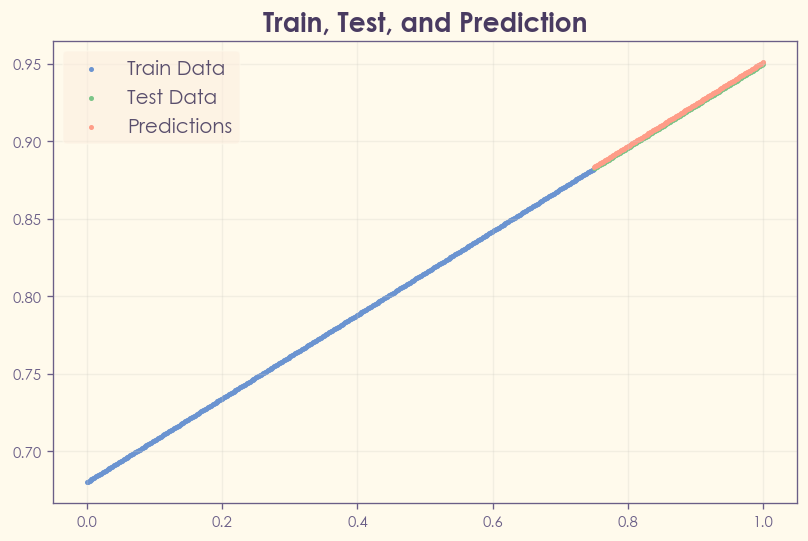

In [18]:
# Visualize the predictions, but first `TRANSFER PREDICTIONS IN THE CPU FOR PLOTTING`
plot_pred(train_data=X_train.cpu(), train_labels=y_train.cpu(),
          test_data=X_test.cpu(), test_labels=y_test.cpu(), 
          predictions=y_preds.cpu())

In [19]:
import numpy as np
# Changing the loss values from Tensors to Numpy first
train_loss_values = np.array(train_loss_values)
test_loss_values = np.array(test_loss_values)

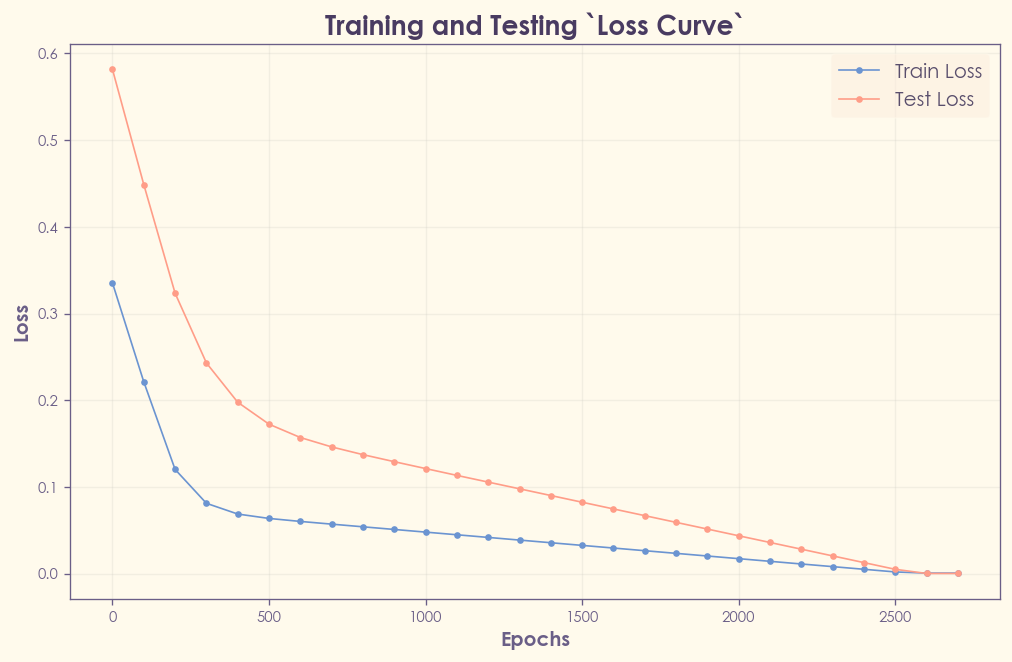

In [20]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, '.-', label="Train Loss")
plt.plot(epoch_count, test_loss_values, '.-', color='#FF9D88', label="Test Loss")
plt.title("Training and Testing `Loss Curve`")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size": 12}, loc='upper right');

In [21]:
# Saving the model
from pathlib import Path

# Create a Model path name
MODEL_PATH = Path('Models')

# Make a model directory
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Give a model name
MODEL_NAME = 'PyTorch_Workflow_Model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the state_dict() of the model
print(f"Saving the Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
          f=MODEL_SAVE_PATH)

Saving the Model to: Models\PyTorch_Workflow_Model.pth


In [22]:
# Make an instance of the model
loaded_model = LinearRegressionModel()

# Load the saved model's state_dict()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

# Load the loaded model in the device
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [23]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2707]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6804], device='cuda:0'))])

In [24]:
# Evaluate the loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

# Check if the loaded model predictions matches with the previous model
check_status = "True" if all(loaded_model_preds == y_preds) else "False"
print(f"The Loaded Model Prediction Match Status is: {check_status}")

The Loaded Model Prediction Match Status is: True
